<a href="https://colab.research.google.com/github/jnpos/group8_ECG/blob/Development/ECG_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jveenland/tm10007_ml.git

Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 62
Unpacking objects: 100% (83/83), 67.93 MiB | 7.21 MiB/s, done.


In [2]:
# General packages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
import zipfile
import os
import pandas as pd

# Metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection

In [3]:
with zipfile.ZipFile('/content/tm10007_ml/ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')



The number of samples: 827
The number of columns: 9001


In [4]:
# Find column with label 
bool_cols = [col for col in data 
             if np.isin(data[col].dropna().unique(), [0, 1]).all()]
loc_label = data.columns.get_loc('label')

# Determine data and output 
y = data['label']
x = pd.DataFrame()
x = data.drop(data.columns[loc_label],axis=1)

# Split test and trainingsdata 
#sss = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.5, random_state=0)
#sss.get_n_splits(X, y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,test_size=0.25,random_state=0,stratify=y)



[[-2274.15452465  -386.78033178]
 [-2271.46324153  -371.09709228]
 [ 3803.09554426 -3562.57043819]
 ...
 [ 1353.19326318   545.26333806]
 [12860.9048367  -4117.36761416]
 [ -619.96780458  -688.24944329]]


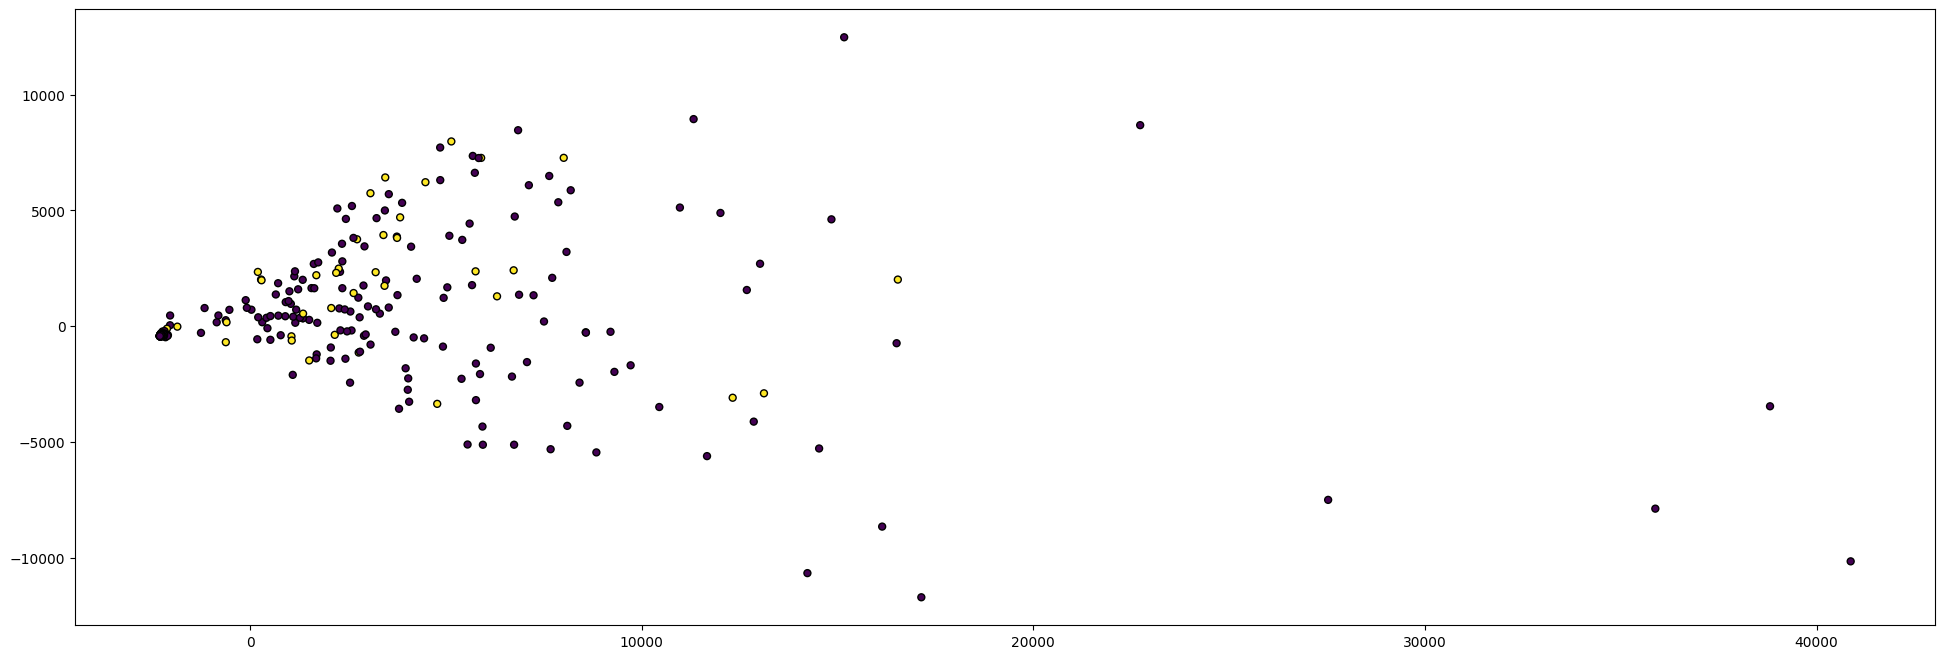

In [12]:
# Reduce dimensionality
n_features = 2

p = PCA(n_components=n_features)
p = p.fit(x_train)
x = p.transform(x_train)

fig = plt.figure(figsize=(24,8))
plt.scatter(x[:,0], x[:,1], marker='o', c=y_train, s=25, edgecolor = 'k')
